In [440]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [ ]:
#EXPLORATORY DATA ANALYSIS

In [442]:
data = pd.read_csv('ml_sensor_weather_data.csv')
data.head()

,air_pressure,air_temperature,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,rain_accumulation,rain_duration,relative_humidity,relative_humidity_pm,row_number
0,919.060000,23.790000,281.100000,3.080354,275.400000,3.863283,0.89,4.0,43.420000,37.160000,0
1,917.347688,21.891024,101.935179,2.443009,140.471549,3.533324,0.00,0.0,24.328697,20.426597,1
2,923.040000,15.910000,51.000000,17.067852,63.700000,22.100967,0.00,20.0,8.900000,14.460000,2
3,920.502751,21.188275,198.832133,4.337363,211.203341,5.190045,0.00,0.0,12.189102,12.742547,3
4,921.160000,6.830000,277.800000,1.856660,136.500000,2.863283,8.90,14730.0,92.410000,76.740000,4


In [443]:
data.drop('row_number',axis=1, inplace=True)
data.head()

,air_pressure,air_temperature,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,rain_accumulation,rain_duration,relative_humidity,relative_humidity_pm
0,919.060000,23.790000,281.100000,3.080354,275.400000,3.863283,0.89,4.0,43.420000,37.160000
1,917.347688,21.891024,101.935179,2.443009,140.471549,3.533324,0.00,0.0,24.328697,20.426597
2,923.040000,15.910000,51.000000,17.067852,63.700000,22.100967,0.00,20.0,8.900000,14.460000
3,920.502751,21.188275,198.832133,4.337363,211.203341,5.190045,0.00,0.0,12.189102,12.742547
4,921.160000,6.830000,277.800000,1.856660,136.500000,2.863283,8.90,14730.0,92.410000,76.740000


In [444]:
data.describe()

,air_pressure,air_temperature,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,rain_accumulation,rain_duration,relative_humidity,relative_humidity_pm
count,1092.000000,1090.000000,1091.000000,1092.000000,1092.000000,1091.000000,1089.000000,1092.000000,1095.000000,1095.000000
mean,918.883467,18.296112,142.244677,5.509200,148.935203,7.020430,0.213538,294.111715,34.242315,35.346554
std,3.184068,6.208619,69.155620,4.552224,67.200799,5.597610,1.597062,1598.078108,25.472378,22.523507
min,907.990000,2.640000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,5.300000
25%,916.550000,14.045000,65.972506,2.256715,76.553003,3.077758,0.000000,0.000000,15.092243,17.395000
50%,918.940000,18.730822,166.000000,3.871333,177.300000,4.943637,0.000000,0.000000,23.179259,24.380000
75%,921.160073,23.028319,191.000000,7.337163,201.233153,8.947760,0.000000,0.000000,45.400000,52.060000
max,929.320000,37.170000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,92.250000


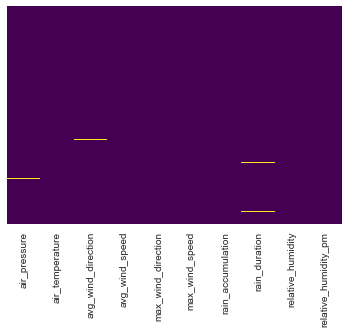

In [445]:
#to check for missing values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [446]:
#drop all mssing values
data.dropna(inplace = True)

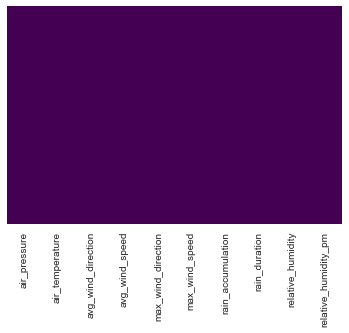

In [447]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [448]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1094
Data columns (total 10 columns):
air_pressure            1064 non-null float64
air_temperature         1064 non-null float64
avg_wind_direction      1064 non-null float64
avg_wind_speed          1064 non-null float64
max_wind_direction      1064 non-null float64
max_wind_speed          1064 non-null float64
rain_accumulation       1064 non-null float64
rain_duration           1064 non-null float64
relative_humidity       1064 non-null float64
relative_humidity_pm    1064 non-null float64
dtypes: float64(10)
memory usage: 91.4 KB


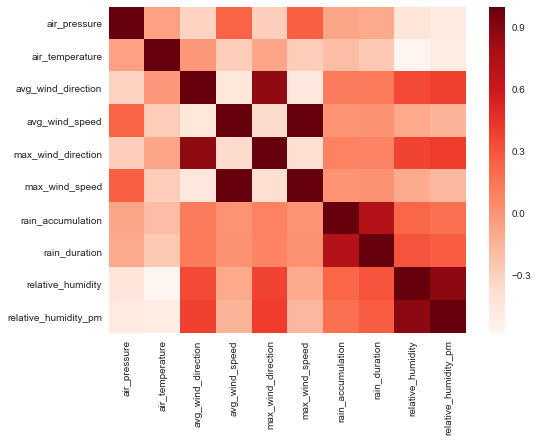

In [449]:
#check for correlation between variables
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),cmap='Reds',annot=False)

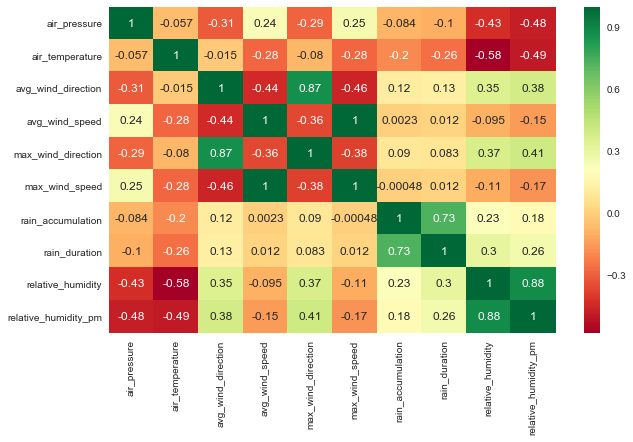

In [450]:
x = data.iloc[:,0:9]
y = data.iloc[:,-1]

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10,6))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

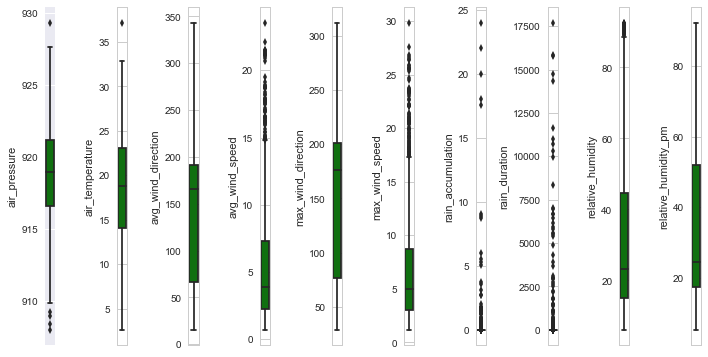

In [451]:
#box plot to view outliers
l = data.columns.values
number_of_columns = 10
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0, len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data[l[i]],color='green',orient='v')
    plt.tight_layout()

In [452]:
#Z score to show outliers
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

threshold = 3
print(np.where(z > 3))

[[0.0490584  0.87786259 2.00742787 ... 0.17465393 0.3685773  0.08990358]
 [0.48983768 0.57165247 0.58408739 ... 0.17731637 0.38467755 0.65864765]
 [1.30163766 0.39278817 1.32083523 ... 0.1640042  0.99342287 0.9255571 ]
 ...
 [0.72514889 0.54407489 0.67959409 ... 0.17731637 0.45419551 0.76762294]
 [1.98402252 0.59273829 0.43948471 ... 0.17731637 1.21371183 1.03468462]
 [0.82641286 1.13586274 0.65402545 ... 0.17731637 0.77010535 0.89692737]]
(array([   4,    4,   41,   54,   54,   96,   96,  105,  105,  201,  246,
        246,  264,  276,  278,  278,  294,  303,  303,  319,  330,  336,
        392,  392,  428,  464,  477,  486,  486,  492,  523,  528,  528,
        552,  552,  552,  564,  564,  591,  638,  638,  654,  654,  669,
        669,  687,  687,  689,  701,  771,  771,  784,  784,  791,  832,
        832,  845,  854,  854,  886,  886,  900,  900,  906,  906,  915,
        915,  958,  958, 1000, 1000], dtype=int64), array([6, 7, 7, 6, 7, 3, 5, 6, 7, 0, 3, 5, 7, 0, 6, 7, 7, 3, 5, 7

In [453]:
#using z score to remove outliers
df = data[(z < 3).all(axis=1)]

In [454]:
df.shape

(1020, 10)

In [455]:
data.shape

(1064, 10)

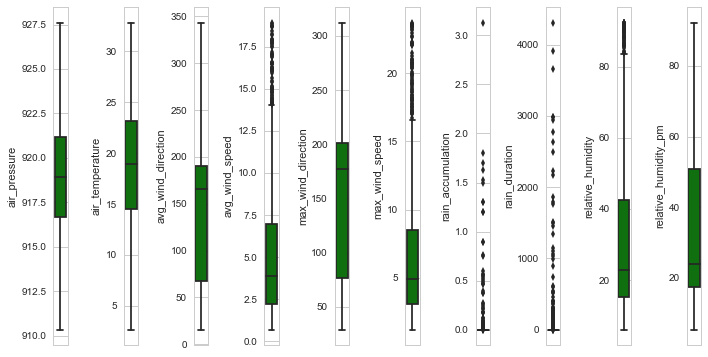

In [456]:
l = df.columns.values
number_of_columns = 10
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0, len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

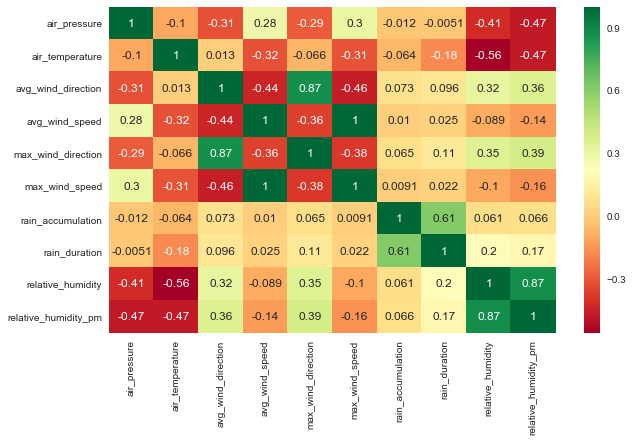

In [458]:
#new_data correlation matrix for each variable
x = df.iloc[:,0:9]
y = df.iloc[:,-1]

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10,6))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [459]:
def scatter_plot(feature,target):
    plt.figure(figsize=(12,8))
    plt.scatter(
        df[feature],
        df[target], 
        c='black'
    )
    plt.xlabel('Sensor Reading of {}'.format(feature))
    plt.ylabel('Relative humidity in the afternoon')
    plt.show()

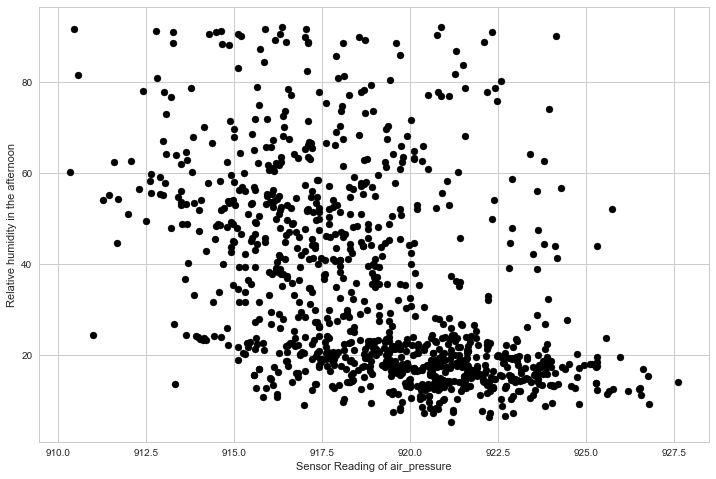

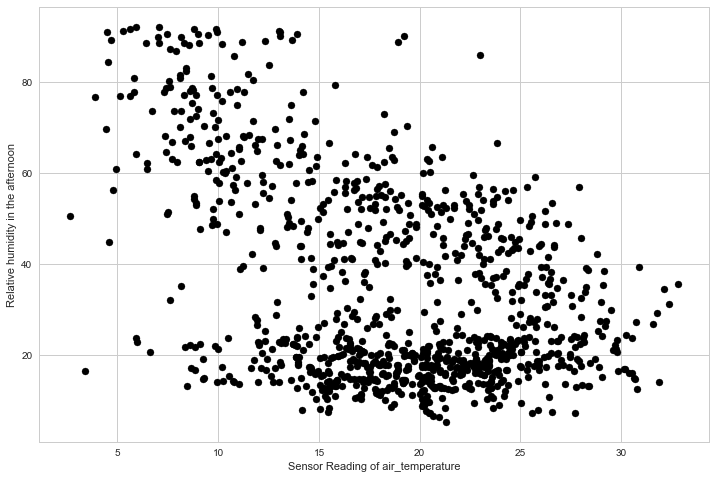

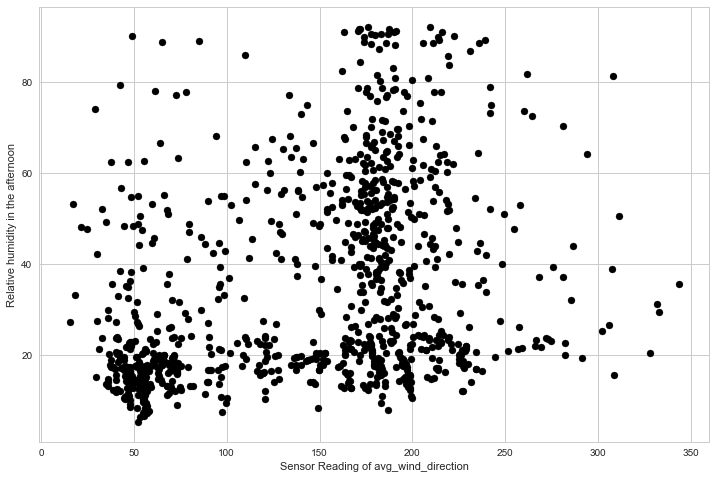

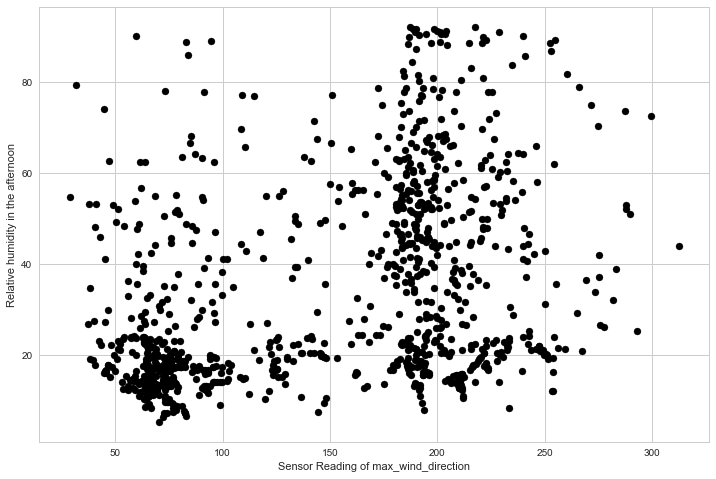

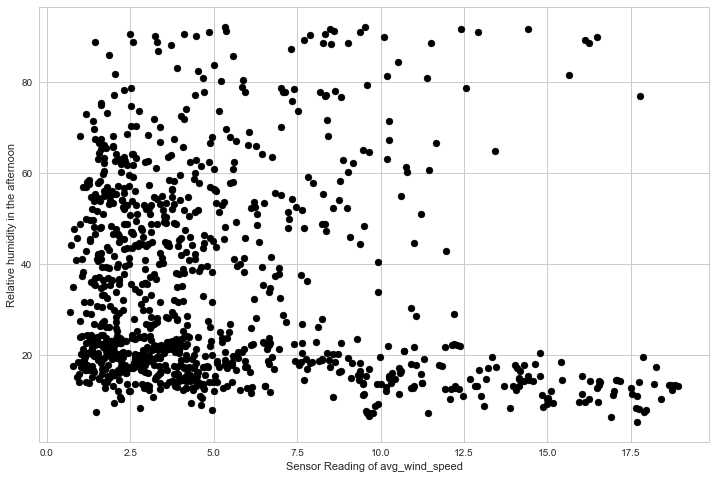

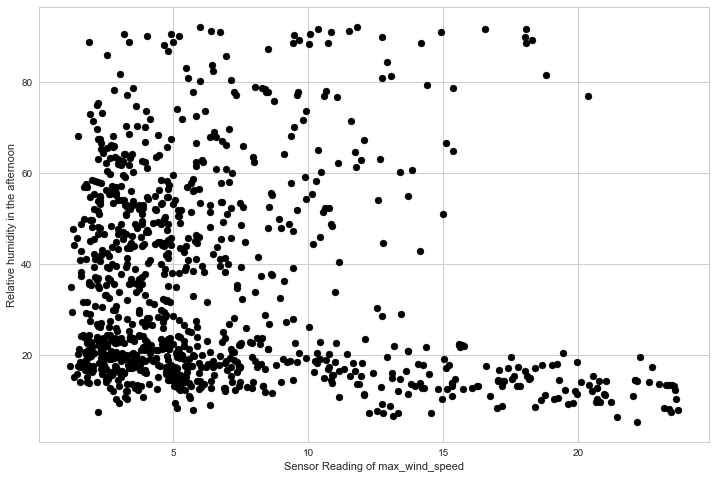

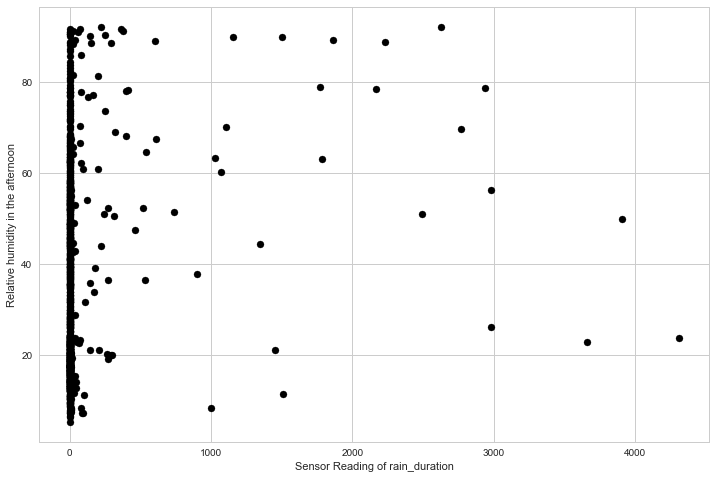

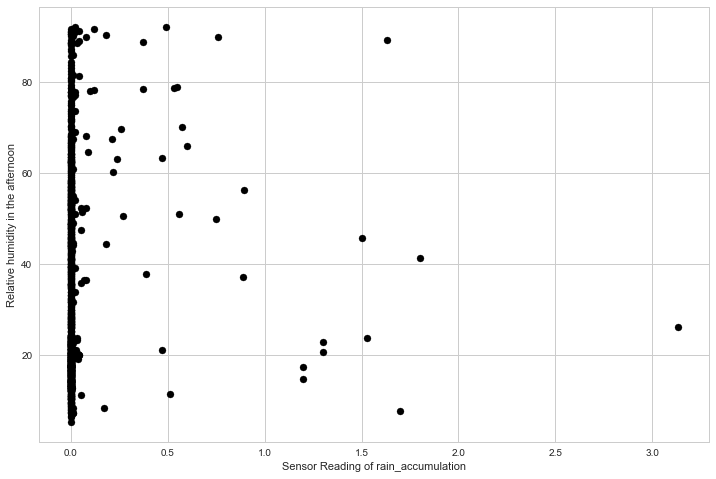

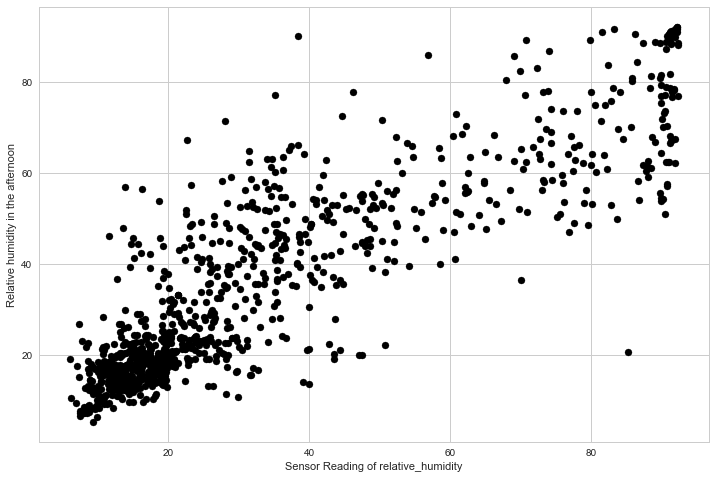

In [460]:
scatter_plot('air_pressure','relative_humidity_pm')
scatter_plot('air_temperature','relative_humidity_pm')
scatter_plot('avg_wind_direction','relative_humidity_pm')
scatter_plot('max_wind_direction','relative_humidity_pm')
scatter_plot('avg_wind_speed','relative_humidity_pm')
scatter_plot('max_wind_speed','relative_humidity_pm')
scatter_plot('rain_duration','relative_humidity_pm')
scatter_plot('rain_accumulation','relative_humidity_pm')
scatter_plot('relative_humidity','relative_humidity_pm')

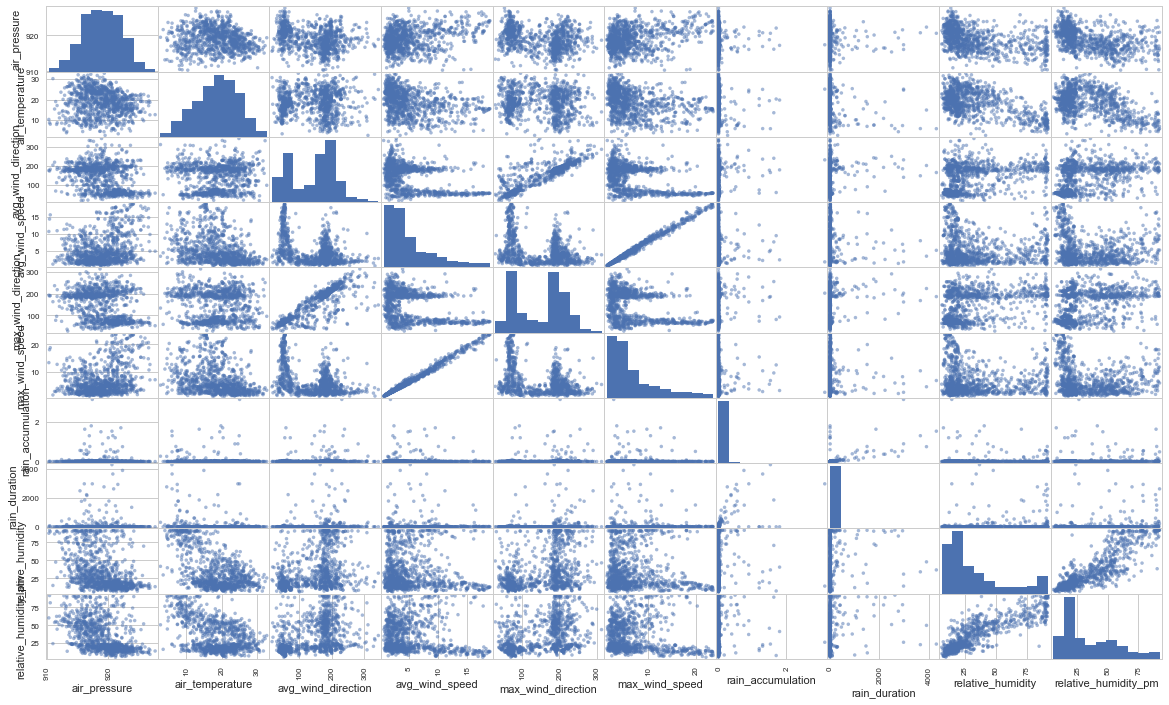

In [462]:
pd.plotting.scatter_matrix(df,figsize=(20,12))
plt.show()

In [469]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [470]:
#REGRESSION: LINEAR REGRESSION
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=20)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(816, 7) (816,)
(204, 7) (204,)


In [477]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [478]:
df.head()

,air_pressure,air_temperature,avg_wind_direction,avg_wind_speed,rain_accumulation,rain_duration,relative_humidity,relative_humidity_pm
0,919.060000,23.790000,281.100000,3.080354,0.89,4.0,43.420000,37.160000
1,917.347688,21.891024,101.935179,2.443009,0.00,0.0,24.328697,20.426597
2,923.040000,15.910000,51.000000,17.067852,0.00,20.0,8.900000,14.460000
3,920.502751,21.188275,198.832133,4.337363,0.00,0.0,12.189102,12.742547
5,915.300000,25.780000,182.800000,9.932014,0.02,170.0,35.130000,33.930000


In [489]:
lm = linear_model.LinearRegression()
results = lm.fit(x_train,y_train)
predictions = lm.predict(x_test)
predictions[0:10]

array([54.8090259 , 54.59416392, 20.49848464, 30.7783861 , 79.12419787,
       20.26965006, 29.40721415, 18.31071316, 30.46024197, 77.35436383])

In [490]:
lm.score(x_train,y_train)

0.7799043358970266

Text(0,0.5,'Predictions')

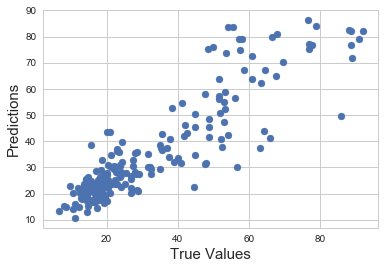

In [491]:
plt.scatter(y_test,predictions)
plt.xlabel("True Values",fontsize=15)
plt.ylabel("Predictions",fontsize=15)

In [492]:
#Root mean squared error
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

9.748812171404497


In [493]:
#Random Forest Regression: Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [494]:
from sklearn.ensemble import RandomForestRegressor
rregressor = RandomForestRegressor(n_estimators=300,random_state=20)
rregressor.fit(x_train, y_train)
y_pred = rregressor.predict(x_test)
print(y_pred[:10])

[53.5524     58.0024     16.99321016 34.00607255 82.65343333 20.52155051
 26.62248599 25.32483794 27.85040922 81.1968    ]


In [496]:
from sklearn import metrics

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error: 6.613804805478351
Mean Squared Error: 79.3698913279355
Root Mean Squared Error: 2.571731868892702
